In [27]:
from PIL import Image
import matplotlib.pyplot as plt


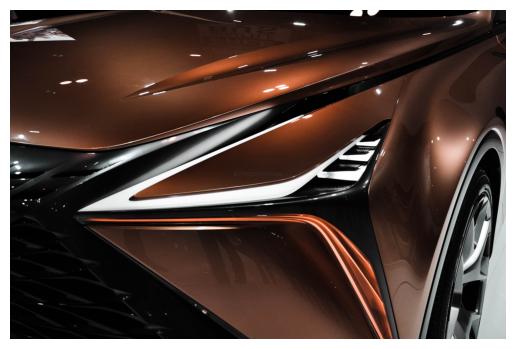

In [60]:

# Load the image
image_path = r'wallpapers\fred-anyona-8dIQuvrcRKw-unsplash.jpg'  # Replace with the path to your image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis("off")  # Hide the axes
plt.show()

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert the image to grayscale
gray_image = np.array(image.convert('L'))

# Apply Canny edge detection
def canny_edge_detection(image, low_threshold, high_threshold, kernel_size=3):
    # Apply Gaussian blur with the kernel size
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    
    # Apply Canny edge detector
    edges = cv2.Canny(blurred_image, low_threshold, high_threshold)
    
    return edges

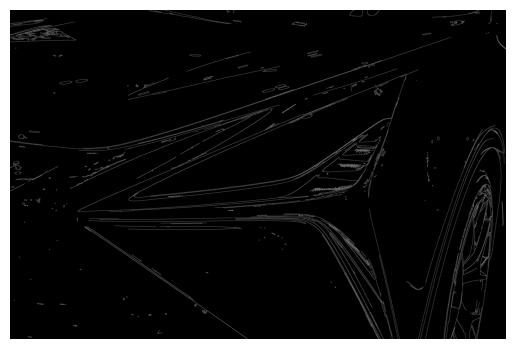

In [62]:
# Set low and high thresholds for Canny
low_threshold = 50
high_threshold = 150

# Set kernel size (adjustable)
kernel_size = 3

# Perform edge detection
edges = canny_edge_detection(gray_image, low_threshold, high_threshold, kernel_size)

# Display the result
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

In [63]:
import numpy as np

def find_contiguous_black_pixels(image):
    # Convert the image to a binary form (black and white)
    # Assuming edges are already detected (0 for black, 255 for white)
    binary_image = (image == 0).astype(int)
    
    # List to store the start and end coordinates of contiguous black pixel regions
    black_pixel_regions = []
    
    # Iterate over each column
    for col in range(binary_image.shape[1]):
        start = None
        for row in range(binary_image.shape[0]):
            if binary_image[row, col] == 1:  # Found a black pixel
                if start is None:
                    start = row  # Mark the start of the contiguous region
            else:
                if start is not None:
                    # End of the contiguous black region
                    black_pixel_regions.append((start, row - 1, col))
                    start = None
        
        # If there was a contiguous region that ended at the last row
        if start is not None:
            black_pixel_regions.append((start, binary_image.shape[0] - 1, col))
    
    return black_pixel_regions




In [64]:
# Example usage
black_pixel_regions = find_contiguous_black_pixels(edges)

# Display the result
for region in black_pixel_regions:
    print(f"Start: Row {region[0]}, End: Row {region[1]}, Column: {region[2]}")

Start: Row 0, End: Row 93, Column: 0
Start: Row 95, End: Row 104, Column: 0
Start: Row 106, End: Row 112, Column: 0
Start: Row 114, End: Row 165, Column: 0
Start: Row 167, End: Row 168, Column: 0
Start: Row 170, End: Row 184, Column: 0
Start: Row 186, End: Row 210, Column: 0
Start: Row 212, End: Row 852, Column: 0
Start: Row 854, End: Row 856, Column: 0
Start: Row 858, End: Row 1025, Column: 0
Start: Row 1027, End: Row 1177, Column: 0
Start: Row 1179, End: Row 2135, Column: 0
Start: Row 0, End: Row 94, Column: 1
Start: Row 96, End: Row 104, Column: 1
Start: Row 106, End: Row 111, Column: 1
Start: Row 113, End: Row 165, Column: 1
Start: Row 167, End: Row 168, Column: 1
Start: Row 170, End: Row 184, Column: 1
Start: Row 186, End: Row 210, Column: 1
Start: Row 212, End: Row 852, Column: 1
Start: Row 854, End: Row 856, Column: 1
Start: Row 858, End: Row 1025, Column: 1
Start: Row 1028, End: Row 1177, Column: 1
Start: Row 1179, End: Row 2135, Column: 1
Start: Row 0, End: Row 94, Column: 2
S

In [65]:

from tqdm import tqdm

def sort_and_recreate_image(original_image, black_pixel_regions):
    # Convert the image to a numpy array for easy pixel manipulation
    original_image_np = np.array(original_image)

    # Create a copy of the original image to modify
    sorted_image_np = original_image_np.copy()

    # Iterate over the black pixel regions with tqdm for progress tracking
    for start_row, end_row, col in tqdm(black_pixel_regions, desc="Processing columns", unit="column"):
        # Extract the pixels in the current column from the start_row to the end_row
        segment_pixels = original_image_np[start_row:end_row+1, col]
        
        # Sort the pixels based on the sum of their RGB values
        sorted_segment = sorted(segment_pixels, key=lambda pixel: sum(pixel))

        # Place the sorted segment back into the new image
        sorted_image_np[start_row:end_row+1, col] = np.array(sorted_segment)

    # Convert the numpy array back to a PIL image
    sorted_image = Image.fromarray(sorted_image_np)
    return sorted_image

In [69]:
# Example usage: Assume `black_pixel_regions` has been previously generated
sorted_image = sort_and_recreate_image(image, black_pixel_regions)

# Display the sorted image
sorted_image.show()

Processing columns: 100%|██████████| 73746/73746 [00:27<00:00, 2725.20column/s]


In [70]:
# Save the sorted image to a file
sorted_image.save("sorted_image3.png")


In [57]:
import numpy as np
import random
from PIL import Image
from tqdm import tqdm

def sort_and_recreate_image_with_noise(original_image, title, black_pixel_regions, ratio=100, noise=0):
    # Convert the image to a numpy array for easy pixel manipulation
    original_image_np = np.array(original_image)

    # Create a copy of the original image to modify
    sorted_image_np = original_image_np.copy()

    # Calculate how many segments to sort based on the ratio
    num_segments_to_sort = int(len(black_pixel_regions) * (ratio / 100))

    # Select a subset of segments to sort (randomly selected)
    segments_to_sort = random.sample(black_pixel_regions, num_segments_to_sort)

    # If noise is > 0, shuffle the selected segments based on noise level
    if noise > 0:
        noise_factor = noise / 100
        random.shuffle(segments_to_sort)  # Randomize the order more for higher noise

        # Simulate noise factor by slightly mixing the segments
        if noise_factor > 0:
            shuffled_segments = []
            for i, segment in enumerate(segments_to_sort):
                # Randomly move this segment in the list based on the noise factor
                shuffle_distance = int(noise_factor * len(segments_to_sort))
                shuffled_index = min(len(segments_to_sort) - 1, i + random.randint(-shuffle_distance, shuffle_distance))
                shuffled_segments.append(segments_to_sort[shuffled_index])
            segments_to_sort = shuffled_segments
    
    # Iterate over the selected black pixel regions to be sorted
    for start_row, end_row, col in tqdm(segments_to_sort, desc="Processing sorted columns", unit="column"):
        # Extract the pixels in the current column from the start_row to the end_row
        segment_pixels = original_image_np[start_row:end_row+1, col]

        # Sort the pixels based on the sum of their RGB values
        sorted_segment = sorted(segment_pixels, key=lambda pixel: sum(pixel))

        # Place the sorted segment back into the new image
        sorted_image_np[start_row:end_row+1, col] = np.array(sorted_segment)

    # Convert the numpy array back to a PIL image
    sorted_image = Image.fromarray(sorted_image_np)
    
    # Save the sorted image to a file
    sorted_image.save(title)
    
    return sorted_image




In [71]:
# Example usage with custom ratio and noise
sorted_image = sort_and_recreate_image_with_noise(image, "sorted_image_with_noise5.png", black_pixel_regions, ratio=50, noise=100)

# Optionally display the new sorted image
sorted_image.show()

Processing sorted columns: 100%|██████████| 36873/36873 [00:13<00:00, 2688.55column/s]
